## 지역별 사투리 데이터 분석 <hr>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os
import string
import math

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud
from PIL import Image
from collections import Counter

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [4]:
Gangwon_file = './DATA/dialect/강원도.csv'
Gyeongsang_file = './DATA/dialect/경상도.csv'
Jeolla_file = './DATA/dialect/전라도.csv'
Jeju_file = './DATA/dialect/제주도.csv'
Chungcheong_file = './DATA/dialect/충청도.csv'

In [5]:
file_list = [Gangwon_file, Gyeongsang_file, Jeolla_file, Jeju_file, Chungcheong_file]

for file in file_list:
    df = pd.read_csv(file)
    file_name = os.path.splitext(file)[0][-3:]
    print(f'{file_name}DF ===> shape : {df.shape}')

강원도DF ===> shape : (128136, 2)
경상도DF ===> shape : (212906, 2)
전라도DF ===> shape : (161859, 2)
제주도DF ===> shape : (50999, 2)
충청도DF ===> shape : (145274, 2)


### 전라도 사투리 데이터 분석 <hr>

#### 불용어 삭제 등 데이터 전처리 => 추가설명 필요

In [6]:
def remove_stopwords(text, stop_words_list):
    tokens = text.split(' ')
    meaningful_words = [w for w in tokens if not w in stop_words_list]
    return ' '.join(meaningful_words)

def sentence_refine(feature, file_path = './DATA/dialect/전라도.csv', stop_word_file = './DATA/hangul_stopword.txt'):
    f = open(stop_word_file, 'r', encoding = 'utf-8')
    stop_words_list = f.read().split('\n')
    f.close()
    df = pd.read_csv(file_path)
    df = df.drop_duplicates()
    df.dropna(inplace = True)
    
    # 라벨 지정
    df = df.melt()

    # 컬럼명 변경
    df.columns = ['label', 'text']

    df[feature] = df[feature].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', regex = True)
    df[feature] = df[feature].str.replace(' +', ' ', regex = True)
    # df[feature] = df[feature].str.replace('^ +', '', regex = True)
    # df[feature] = df[feature].str.replace('[^\w\s]', '', regex = True)
    df[feature] = df[feature].str.replace('([ㄱ-ㅎㅏ-ㅣ]+)', '', regex = True)
    # df[feature] = df[feature].replace(r'[{}]'.format(string.punctuation), '', regex = True)
    # df[feature] = df[feature].str.replace('[a-zA-Z]', '', regex = True)
    
    df.loc[:, feature] = df[feature].apply(lambda x : remove_stopwords(x, stop_words_list))
    df = df[df[feature] != '']
    # df[feature] = documentDF[documentDF[feature].str.len() != 0].squeeze()
    df.loc[:, feature] = df[feature].str.strip()
    # df = df[df[feature].str.len() >= 2]
    df.reset_index(drop = True, inplace = True)
    
    for ind in range(df.shape[0]):
        if type(df.loc[ind, 'text']) is float:
            print('float')
    
    return df

In [7]:
# kangwonDF = sentence_refine('text', './DATA/dialect/강원도.csv')
# gyeongsangDF = sentence_refine('text', './DATA/dialect/경상도.csv')
jeollaDF = sentence_refine('text', './DATA/dialect/전라도.csv')
# jejuDF = sentence_refine('text', './DATA/dialect/제주도.csv')
# chungcheongDF = sentence_refine('text', './DATA/dialect/충청도.csv')

In [8]:
jeollaDF

,label,text
0,사투리,시방 집 짓니라고 이렇게 고생들을 허시는디 나가 참이라도 잘 준비해야제
1,사투리,저그가 한아버지 때부터 살던 자리인디 그런 자리에다가 집을 지은게 우리한테는 큰 공사제
2,사투리,태풍이 오면은 강한 태풍이나 바람이 치고 하면은 밖에 나가지 말고 집 안 쪽에 큰 ...
3,사투리,아따 인자 가을이라고 논들도 차차 옷을 갈아입구마잉
4,사투리,열두 서너 살 때부터 묵어서부터 장 장을 댕기면서 장땅 물건을 멘 날리고 갖 가지고...
...,...,...
251997,표준어,배추가 짜지는 않겠는데 그런 거 같으면 배추를 물에다 씻어버려
251998,표준어,키워본 적이 없어잉 뭣이 나을지는 모르겠어 근데 닭은 그냥 키웠어 옛날에 김장이 아...
251999,표준어,사십 분 올 삼십 분 올 때는 빠르게 하고 한 반 걸어 그렇게 하면은 만 보 못 되...
252000,표준어,이게 고장이 났을까 경운기가 어디가 고장나 버렸어


In [9]:
# 전라도 사투리 text 길이 분포
df = jeollaDF[jeollaDF['label'] == '사투리']
d_lengths = df['text'].str.len()
d_lengths.value_counts(bins = [i for i in range(0, d_lengths.max() + 1, 100)], sort = False)

text
(-0.001, 100.0]     88842
(100.0, 200.0]      14093
(200.0, 300.0]      10311
(300.0, 400.0]       5891
(400.0, 500.0]       2572
(500.0, 600.0]       1706
(600.0, 700.0]       1225
(700.0, 800.0]        666
(800.0, 900.0]        334
(900.0, 1000.0]       163
(1000.0, 1100.0]       82
(1100.0, 1200.0]       42
(1200.0, 1300.0]       23
(1300.0, 1400.0]       14
(1400.0, 1500.0]       13
(1500.0, 1600.0]        9
(1600.0, 1700.0]        4
(1700.0, 1800.0]        3
(1800.0, 1900.0]        3
(1900.0, 2000.0]        2
(2000.0, 2100.0]        0
(2100.0, 2200.0]        1
(2200.0, 2300.0]        0
Name: count, dtype: int64

In [10]:
# 표준어 text 길이 분포
df = jeollaDF[jeollaDF['label'] == '표준어']
s_lengths = df['text'].str.len()
s_lengths.value_counts(bins = [i for i in range(0, s_lengths.max() + 1, 100)], sort = False)

text
(-0.001, 100.0]     89004
(100.0, 200.0]      14121
(200.0, 300.0]      10373
(300.0, 400.0]       5766
(400.0, 500.0]       2516
(500.0, 600.0]       1707
(600.0, 700.0]       1212
(700.0, 800.0]        643
(800.0, 900.0]        313
(900.0, 1000.0]       156
(1000.0, 1100.0]       79
(1100.0, 1200.0]       39
(1200.0, 1300.0]       22
(1300.0, 1400.0]       15
(1400.0, 1500.0]       13
(1500.0, 1600.0]        8
(1600.0, 1700.0]        4
(1700.0, 1800.0]        3
(1800.0, 1900.0]        3
(1900.0, 2000.0]        1
(2000.0, 2100.0]        0
(2100.0, 2200.0]        1
(2200.0, 2300.0]        0
Name: count, dtype: int64

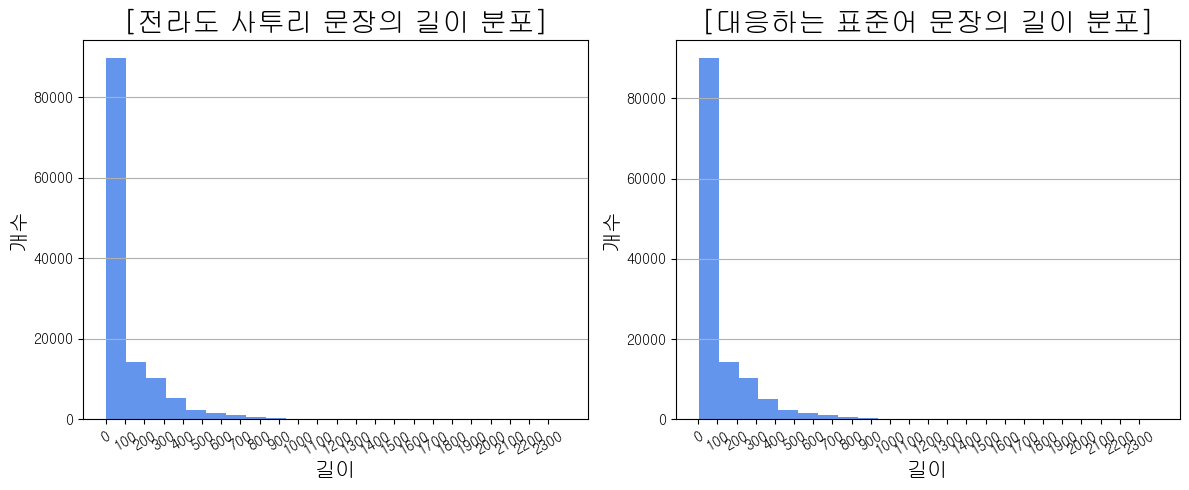

In [11]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.hist(d_lengths.values, bins = 23, color = 'cornflowerblue')
plt.xticks([i for i in range(0, d_lengths.max(), 100)], rotation = 30)
plt.title('[전라도 사투리 문장의 길이 분포]', size = 20)
plt.xlabel('길이', size = 15)
plt.ylabel('개수', size = 15)
plt.grid(axis = 'y')

plt.subplot(1, 2, 2)
plt.hist(s_lengths.values, bins = 23, color = 'cornflowerblue')
plt.xticks([i for i in range(0, s_lengths.max(), 100)], rotation = 30)
plt.title('[대응하는 표준어 문장의 길이 분포]', size = 20)
plt.xlabel('길이', size = 15)
plt.ylabel('개수', size = 15)
plt.grid(axis = 'y')

plt.tight_layout()
plt.show()

#### 사투리 / 표준어 문장 유사도 계산 => TF-IDF를 활용한 코사인 유사도 계산

In [12]:
def remove_stopwords(text, stop_words_list):
    tokens = text.split(' ')
    meaningful_words = [w for w in tokens if not w in stop_words_list]
    return ' '.join(meaningful_words)

def sentence_refine2(feature1, feature2, file_path = './DATA/dialect/전라도.csv', stop_word_file = './DATA/hangul_stopword.txt'):
    f = open(stop_word_file, 'r', encoding = 'utf-8')
    stop_words_list = f.read().split('\n')
    f.close()
    df = pd.read_csv(file_path)
    df = df.drop_duplicates()
    df.dropna(inplace = True)

    df1 = df[[feature1]]
    df[feature1] = df[feature1].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', regex = True)
    df[feature1] = df[feature1].str.replace(' +', ' ', regex = True)
    # df[feature1] = df[feature1].str.replace('^ +', '', regex = True)
    # df[feature1] = df[feature1].str.replace('[^\w\s]', '', regex = True)
    df[feature1] = df[feature1].str.replace('([ㄱ-ㅎㅏ-ㅣ]+)', '', regex = True)
    # df[feature1] = df[feature1].replace(r'[{}]'.format(string.punctuation), '', regex = True)
    # df1[:, feature1] = df1[:, feature1].str.replace('[a-zA-Z]', '', regex = True)  
    df1.loc[:, feature1] = df1[feature1].apply(lambda x : remove_stopwords(x, stop_words_list))  # 경고 메세지 방지하기 위해 loc사용
    
    df2 = df[[feature2]]
    df[feature2] = df[feature2].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', regex = True)
    df[feature2] = df[feature2].str.replace(' +', ' ', regex = True)
    # df[feature2] = df[feature2].str.replace('^ +', '', regex = True)
    # df[feature2] = df[feature2].str.replace('[^\w\s]', '', regex = True)
    df[feature2] = df[feature2].str.replace('([ㄱ-ㅎㅏ-ㅣ]+)', '', regex = True)
    # df[feature2] = df[feature2].replace(r'[{}]'.format(string.punctuation), '', regex = True)
    # df2[:, feature1] = df2[:, feature1].str.replace('[a-zA-Z]', '', regex = True)
    df2.loc[:, feature2] = df2[feature2].apply(lambda x : remove_stopwords(x, stop_words_list))

    df1 = df1[df1[feature1] != '']
    df2 = df2[df2[feature2] != '']
    df1.loc[:, feature1] = df1[feature1].str.strip()
    df2.loc[:, feature2] = df2[feature2].str.strip()
    df1.reset_index(drop = True, inplace = True)
    df2.reset_index(drop = True, inplace = True)
    
    return df1, df2

In [13]:
dialectDF, standardDF = sentence_refine2('사투리', '표준어')

In [14]:
dialectDF

,사투리
0,시방 집 짓니라고 이렇게 고생들을 허시는디 나가 참이라도 잘 준비해야제
1,저그가 한아버지 때부터 살던 자리인디 그런 자리에다가 집을 지은게 우리한테는 큰 공사제
2,태풍이 오면은 강한 태풍이나 바람이 치고 하면은 밖에 나가지 말고 집 안 쪽에 큰 ...
3,아따 인자 가을이라고 논들도 차차 옷을 갈아입구마잉
4,열두 서너 살 때부터 묵어서부터 장 장을 댕기면서 장땅 물건을 멘 날리고 갖 가지고...
...,...
125996,배추가 짜든 않겄는디 쪼까 거시기허면 배추를 물에다 씨처부러
125997,키워본 적이 없어잉 뭣이 낫을지는 모르겠어 근디 닭은 그냥 키웠어 옛날에 김장이 아...
125998,사십 분 올 삼십 분 올 때는 빠르게 하고 근게 한 반 걸어 그렇게 하면은 만 보 ...
125999,이게 고장이 난디 경운기가 어디가 고장나 버렸어


In [15]:
standardDF

,표준어
0,시방 집 짓느라고 이렇게 고생들을 하시는데 내가 참이라도 잘 준비해야지요
1,저기가 할아버지 때부터 살던 자리인데 그런 자리에다가 집을 지으니까 우리한테는 큰 공사지
2,태풍이 오면은 강한 태풍이나 바람이 치고 하면은 밖에 나가지 말고 집 안 쪽에 큰 ...
3,이제 가을이라고 논들도 차차 옷을 갈아입네요
4,열두 서너 살 때부터 먹어서부터 장 장을 다니면서 장에다 물건을 메다 나르고 갖 가...
...,...
125996,배추가 짜지는 않겠는데 그런 거 같으면 배추를 물에다 씻어버려
125997,키워본 적이 없어잉 뭣이 나을지는 모르겠어 근데 닭은 그냥 키웠어 옛날에 김장이 아...
125998,사십 분 올 삼십 분 올 때는 빠르게 하고 한 반 걸어 그렇게 하면은 만 보 못 되...
125999,이게 고장이 났을까 경운기가 어디가 고장나 버렸어


In [16]:
def cosine_similarity_distribution(number, random_state = None, df1 = dialectDF, df2 = standardDF):
    
    df = pd.concat([df1, df2], axis = 1)
    df = df.sample(number, random_state = random_state)
    corpus = set(list(df['사투리'].values) + list(df['표준어'].values))
        
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(corpus)
    # tfidf_matrix = tfidf_vectorizer.transform(corpus)
    
    result = []
    for i in df.index:
        d_vector = tfidf_vectorizer.transform([df.loc[i, '사투리']])
        s_vector = tfidf_vectorizer.transform([df.loc[i, '표준어']])
        result.append(cosine_similarity(d_vector, s_vector).item())
    
    cosine_similarityDF = pd.DataFrame({'cosine similarity' : result})
    print(cosine_similarityDF.describe())

    plt.figure(figsize = (7, 5))

    # pandas hist의 bins는 경계 왼쪽 포함, 오른쪽 미포함, 단 양끝점은 포함
    cosine_similarityDF.hist(color = 'cornflowerblue', bins = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.001])
    plt.title(f'[데이터 {number}개의 유사도 분포]', size = 20)
    plt.xlabel('코사인 유사도', size = 15)
    plt.xticks(np.arange(0, 1.1, 0.1), label = list(map(str, np.arange(0, 1.1, 0.1))))
    plt.ylabel('개수', size = 15)
    plt.grid(axis = 'x')

    # cut 메서드는 bin 경계 왼쪽 미포함, 오른쪽 포함이므로 right = False로 설정
    similarity = pd.cut(cosine_similarityDF['cosine similarity'], bins = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.001], right = False).value_counts(sort = False)
    x = np.arange(0.05, 1, 0.1)
    y = similarity.values
    for i in range(10):
        plt.text(x[i], y[i], y[i], fontsize = 13, color = 'black', horizontalalignment = 'center', verticalalignment = 'bottom')
    
    plt.show()

       cosine similarity
count         500.000000
mean            0.710642
std             0.214574
min             0.159720
25%             0.543273
50%             0.728308
75%             0.901305
max             1.000000


<Figure size 700x500 with 0 Axes>

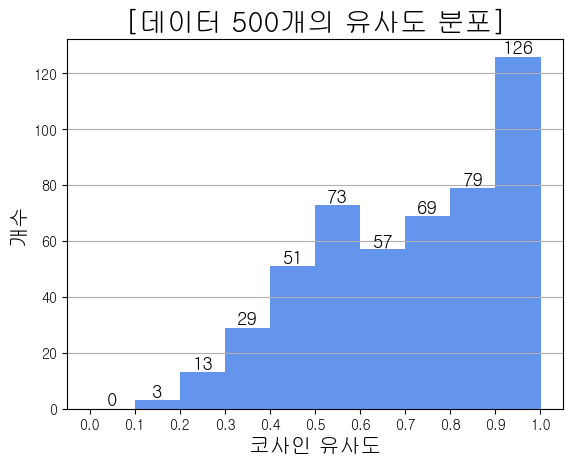

In [17]:
cosine_similarity_distribution(500, 42)

### 사투리 / 표준어 워드 클라우드

In [18]:
dwordDF = dialectDF['사투리'].str.split().to_frame()
swordDF = standardDF['표준어'].str.split().to_frame()

In [19]:
dialect_word_list = []
for idx, List in dwordDF.iterrows():
    dialect_word_list += List[0]

standard_word_list = []
for idx, List in swordDF.iterrows():
    standard_word_list += List[0]

In [20]:
dialect_counts = Counter(dialect_word_list)
standard_counts = Counter(standard_word_list)

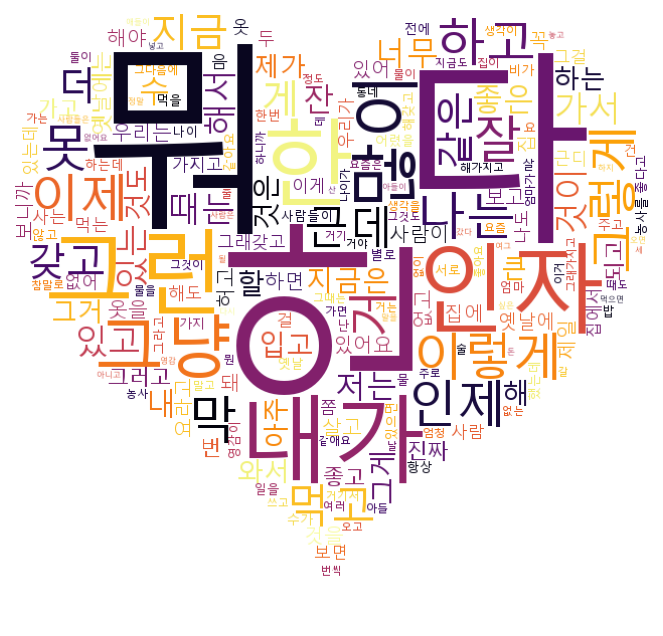

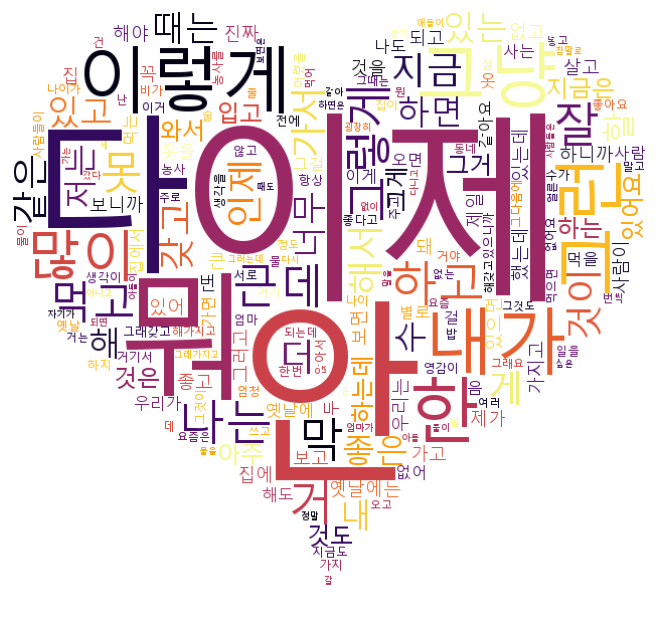

In [21]:
# 한글을 분석하기위해 font를 한글로 지정
path = r'c:\Windows\Fonts\malgun.ttf'

img_mask = np.array(Image.open('./DATA/heart.png'))
wc = WordCloud(font_path = path, width = 400, height = 400,
               background_color = 'white', max_font_size = 200,
               repeat = True,
               colormap = 'inferno', mask = img_mask)

# 사투리 워드클라우드
cloud = wc.generate_from_frequencies(dict(dialect_counts))
# 생성된 WordClound를 test.jpg로 보낸다.
cloud.to_file('dialect.jpg')
plt.figure(figsize = (10, 8))
plt.axis('off')
plt.imshow(cloud)

# 표준어 워드클라우드
cloud = wc.generate_from_frequencies(dict(standard_counts))
# 생성된 WordClound를 test.jpg로 보낸다.
cloud.to_file('standard.jpg')
plt.figure(figsize = (10, 8))
plt.axis('off')
plt.imshow(cloud)

plt.show()